### Data Description

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and already cleaned. The dataset includes pickup time, geo-coordinates, number of passengers, and several other variables. 

### Data fields
id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

### Data Manipulation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import calendar
sns.set()

In [2]:
train = pd.read_csv (r'C:\Users\sylve\Downloads\ConfluxAI classes_notebooks\Project 1\train.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (train)

                id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.

In [3]:
# Looking at numerical columns
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
train.shape

(1458644, 11)

In [8]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
# Checking the type of data
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
# Checks the columns for any NaN or missing values
train.isnull().any() 

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

In [11]:
train.isnull().sum() # Total missing values for each feature

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
train.isnull().sum().sum() # Total number of missing values

0

In [13]:
train.isnull().values.any() # Any missing values?

False

In [14]:
# Checks percentage of nulls in every column
train.isna().sum()/(len(train))*100 

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

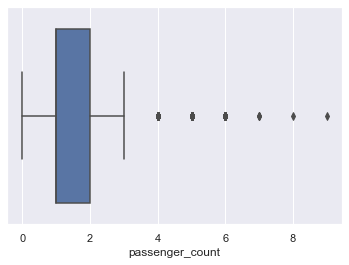

In [15]:
sns.boxplot(x=train['passenger_count'])

### Key observations from the data
- No numeriacal columns with missing data.
- The passenger count varies between 1 and 9 with most people being 1 or 2
- The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.

Text(0.5, 1.0, 'Boxplot of duration distribution')

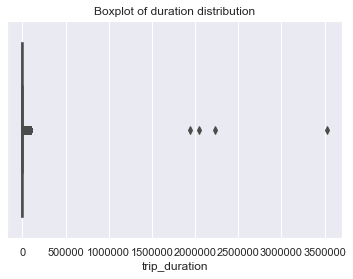

In [16]:
# Detecting outliers
sns.boxplot(x=train['trip_duration'], orient='horizontal')
plt.title('Boxplot of duration distribution')

- From the boxplot, there are 3 values near 2000000 and 1 value near 3500000, while others are closer to 0 and 500000. 
- Thus the 4 points are considered outliers in the data

In [17]:
train['trip_duration'].nlargest(8)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
Name: trip_duration, dtype: int64

- Clearly the duration of the top 4 rows is comparatively much higher than the subsequent rows
- The rows can therefore be removed from the dataframe.

#### Removing the outliers

In [18]:
train = train[~train.trip_duration.isin(train['trip_duration'].nlargest(4).tolist())]

In [19]:
train['trip_duration'].nlargest(5)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
Name: trip_duration, dtype: int64

### Distribution of the trip_duration after removing outliers

Text(0.5, 1.0, 'Distribution of the pickup distribution after removing outliers')

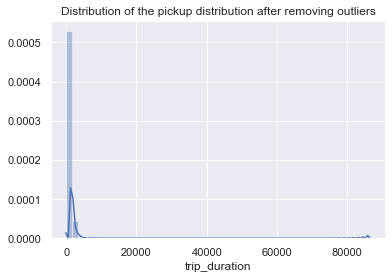

In [20]:
sns.distplot(train['trip_duration'])
plt.title('Distribution of the pickup distribution after removing outliers')

Theres still an extreme right skewness. Thus we will divide the trip_duration column into intervals of:
- <5 hrs
- 5-10 hrs
- 10-15 hrs
- 15-20 hrs
- '>20' hrs

In [21]:
bins=np.array([0,1800,3600,5400,7200,90000])
train['duration_time'] = pd.cut(train.trip_duration,bins,labels=["> 5", "5-10", "10-15", "15-20", ">20"])

In [22]:
train.duration_time.value_counts()

> 5      1345526
5-10      100801
10-15       9220
>20         2249
15-20        844
Name: duration_time, dtype: int64

### EDA

a) The total number of trips?

b) The total number of unique vendors?

c) Derive new field, distance from pickup to dropoff using some python library

d) Descriptive stats for trip duration, distance, and passenger count? (Min, Max, Avg, SD, variance, quantiles)

e) Histogram with meaningful bins for trip duration, distance, and passenger count.
This will help us to know data better? For this create separate fields duration_bins, distance_bins, and passengercount_bins? Create new data frames by grouping bins and getting the count of each bin and then doing a plot(Bar/pie)

f) Divide time into early morning, morning, afternoon, evening, night and midnight. 
Now do a bar and pie chart to see the number of trips in different times? This will be a new field.

g)Geo plot using lat and long to understand the distribution of trips? 

h) Scatter plot to understand distance vs duration relation. Stacked bar chart to understand the same but with bins.

i) Line plot to understand daily number of trips, distance travelled and total passengers

### Total number of trips

In [23]:
print("Total Trips: ", train.id.unique().shape[0])

Total Trips:  1458640


### Total number of unique vendors

In [24]:
print("Total vendors: ", train.vendor_id.unique().shape[0])

Total vendors:  2


### Distance from pickup to dropoff location using haversine distance.

In [25]:
#pip install mpu --user

In [26]:
import mpu
# Used to get the haversine distance

In [27]:
listA = []

for index, row in train.iterrows():
    
    # Point one
    pickup_lat = row['pickup_latitude']
    pickup_long = row['pickup_longitude']
    
    # Point two
    drop_lat = row['dropoff_latitude']
    drop_long = row['dropoff_longitude']
    
    dist = mpu.haversine_distance((pickup_lat, pickup_long), (drop_lat, drop_long))
    listA.append(dist)

In [28]:
train['trip_distance'] = listA

In [29]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_time,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,> 5,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,> 5,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,5-10,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,> 5,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,> 5,1.188588


In [30]:
# from haversine import haversine, Unit
# The haversine.Unit enum contains all supported units

### Descriptive stats for trip duration, distance, and passenger count

In [31]:
train[['trip_duration', 'trip_distance', 'passenger_count']].describe()

,trip_duration,trip_distance,passenger_count
count,1.458640e+06,1.458640e+06,1.458640e+06
mean,9.528153e+02,3.440841e+00,1.664531e+00
std,3.171322e+03,4.296499e+00,1.314244e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.970000e+02,1.231834e+00,1.000000e+00
50%,6.620000e+02,2.093711e+00,1.000000e+00
75%,1.075000e+03,3.875323e+00,2.000000e+00
max,8.639200e+04,1.240909e+03,9.000000e+00


### Column Level Analysis

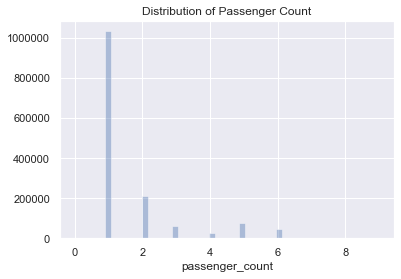

In [32]:
sns.distplot(train['passenger_count'], kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

### Distribution of Pickup and Dropoff day of the week

#### Converting pickup_datetime and dropoff_datetime into proper data format

In [33]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

#### Converting the dates into days of the week

In [34]:
train['pickup_day']=train['pickup_datetime'].dt.day_name()
train['dropoff_day']=train['dropoff_datetime'].dt.day_name()

### Pickup Distribution by day of the week

In [35]:
train['pickup_day'].value_counts()

Friday       223533
Saturday     220866
Thursday     218574
Wednesday    210136
Tuesday      202747
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

### Dropoff Distribution by day of the week

In [36]:
train['dropoff_day'].value_counts()

Friday       223030
Saturday     220902
Thursday     217746
Wednesday    209789
Tuesday      202517
Sunday       197223
Monday       187433
Name: dropoff_day, dtype: int64

### Plotting the pickup and dropoff by day of the week

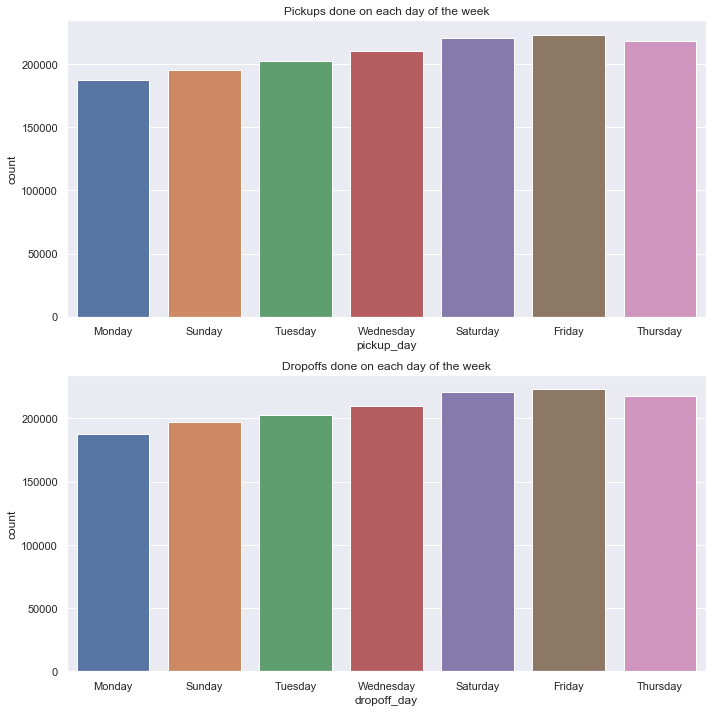

In [37]:
figure, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

sns.countplot(x='pickup_day', data=train, ax=ax[0])
ax[0].set_title('Pickups done on each day of the week')

sns.countplot(x='dropoff_day', data=train, ax=ax[1])
ax[1].set_title('Dropoffs done on each day of the week')

plt.tight_layout()

- Most trips are seen to have been taken on Friday with Monday being the least

### Pickup and Dropoff Distribution by time of the day

Dividing the times into 6 time zones:
- Early morning (4hrs to 8hrs)
- Morning (8hrs to 12hrs)
- Afternoon (12 hrs to 17 hrs)
- Evening (17hrs to 20hrs)
- Night (20hrs to 0hrs)
- Midnight (0hrs to 4hrs)

In [38]:
from datetime import datetime, date, time
def get_time_bin(x):
    if x >= datetime.time(4, 0, 1) and x <= datetime.time(8, 0, 0):
        return 'early morning'
    if x >= datetime.time(8, 0, 1) and x <= datetime.time(12, 0, 0):
        return 'morning'
    elif x >= datetime.time(12, 0, 1) and x <= datetime.time(17, 0, 0):
        return 'afternoon'
    elif x >= datetime.time(17, 0, 1) and x <= datetime.time(20, 0, 0):
        return 'evening'
    elif x >= datetime.time(20, 0, 1) and x <= datetime.time(0, 0, 0):
        return 'night'
    elif x >= datetime.time(0, 0, 1) and x <= datetime.time(4, 0, 0):
        return 'mid night'
    

In [39]:
#train['pickup_timezone'] = train['pickup_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d  %H:%M:%S").time()) )
#train['dropoff_timezone'] = train['dropoff_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d  %H:%M:%S").time()) )

### Geo plot using lat and long to understand the distribution of trips

In [40]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [41]:
geometry = [Point(xy) for xy in zip(train['pickup_longitude'], train['pickup_latitude'])]
gdf = GeoDataFrame(train, geometry=geometry)   

In [42]:
from descartes import PolygonPatch

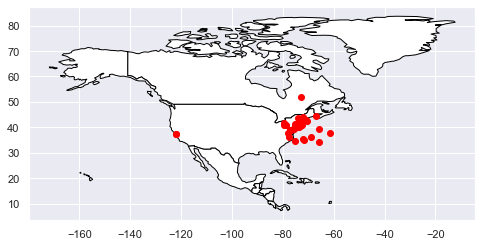

In [43]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Restricting to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', figsize=(8, 8))

# Plotting the ``GeoDataFrame``
gdf.plot(ax=ax, color='red')

plt.show()

### Line plot to understand daily number of trips, distance travelled, trip duration and total passengers

#### No. of Trips

C:\Users\sylve\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


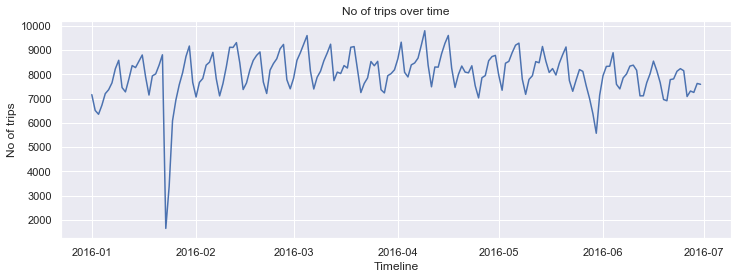

In [44]:
# No of trips time-series by day
data = train.groupby(train.pickup_datetime.dt.date).aggregate({'id':['nunique']})
plt.figure(figsize=(12,4))
plt.title('No of trips over time')
plt.ylabel('No of trips') ; plt.xlabel('Timeline')
plt.plot(data)
pass

#### Trip duration

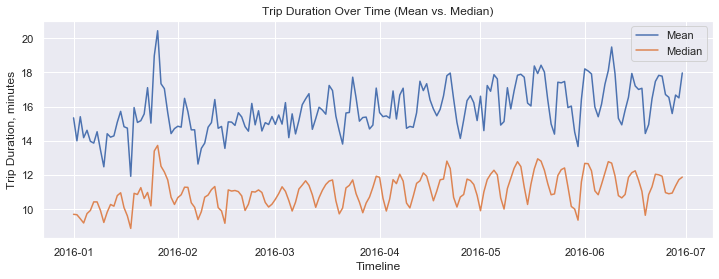

In [45]:
# trip duration time-series by day, mean vs median
data = train.groupby(train.pickup_datetime.dt.date).aggregate({'trip_duration':['mean', 'median']})/60
plt.figure(figsize=(12,4))
plt.title('Trip Duration Over Time (Mean vs. Median)')
plt.ylabel('Trip Duration, minutes'); plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

#### Trip Duration By Vendors comparison

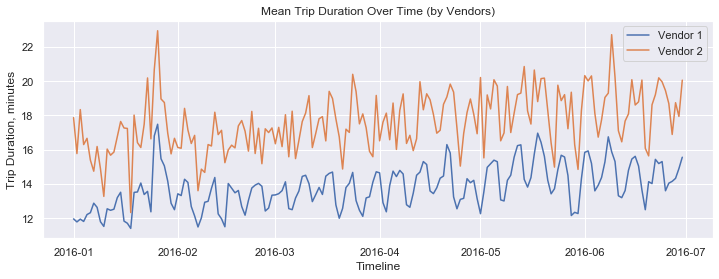

In [46]:
data = pd.crosstab(index=train.pickup_datetime.dt.date,
                  columns=train.vendor_id,
                  values=train.trip_duration/60,
                  aggfunc='mean')
plt.figure(figsize=(12,4))
plt.title('Mean Trip Duration Over Time (by Vendors)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Vendor 1', 'Vendor 2'])
pass

#### No. of passengers

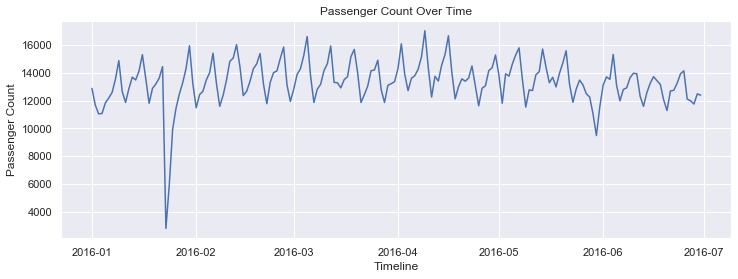

In [47]:
# Total passengers time-series by day
data = train.groupby(train.pickup_datetime.dt.date).aggregate({'passenger_count':['sum']})
plt.figure(figsize=(12,4))
plt.title('Passenger Count Over Time')
plt.ylabel('Passenger Count') ; plt.xlabel('Timeline')
plt.plot(data)
pass

#### No. of passengers Vendors comparison

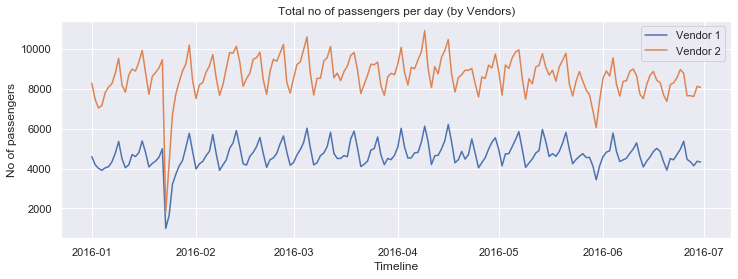

In [48]:
data = pd.crosstab(index=train.pickup_datetime.dt.date,
                  columns=train.vendor_id,
                  values=train.passenger_count,
                  aggfunc='sum')
plt.figure(figsize=(12,4))
plt.title('Total no of passengers per day (by Vendors)')
plt.ylabel('No of passengers') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Vendor 1', 'Vendor 2'])
pass

### Scatter plot to understand distance vs duration relation

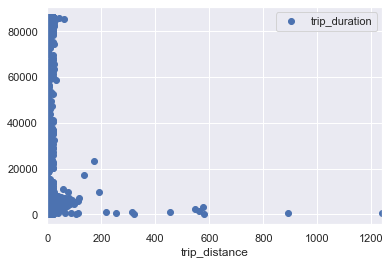

In [49]:
train.plot(x='trip_distance', y='trip_duration', style='o')

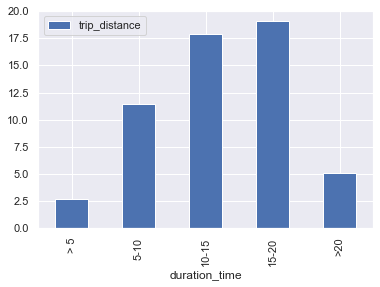

In [50]:
train.groupby(['duration_time'])['trip_distance'].mean().reset_index().plot(x='duration_time', y = 'trip_distance', kind = 'bar')

### Histogram with meaningful bins for trip duration, distance, and passenger count

For this create separate fields duration_bins, distance_bins, and passengercount_bins. Create new data frames by grouping bins and getting the count of each bin and then doing a plot(Bar/pie)

(array([  3.,   3.,  14.,  22.,  33.,  49.,  78., 100., 115., 136., 123.,
         98.,  98.,  67.,  28.,  14.,   9.,   3.,   4.,   3.]),
 array([-3.04801876, -2.72650022, -2.40498169, -2.08346315, -1.76194462,
        -1.44042608, -1.11890754, -0.79738901, -0.47587047, -0.15435194,
         0.1671666 ,  0.48868514,  0.81020367,  1.13172221,  1.45324074,
         1.77475928,  2.09627782,  2.41779635,  2.73931489,  3.06083342,
         3.38235196]),
 <a list of 20 Patch objects>)

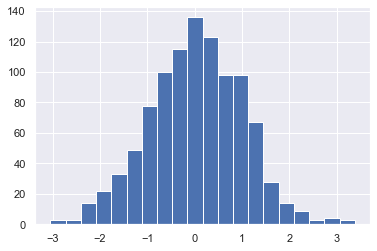

In [51]:
x = np.random.randn(1000)
plt.hist(x, bins=20)